<a href="https://colab.research.google.com/github/MudSnail/Land_Cover_Classification/blob/main/Layer%20Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount to Drive
from google.colab import drive
drive.mount('/content/drive')

#Import Pandas and Numpy
import pandas as pd
import numpy as np

#Import Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#misc
import copy
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


# Read in Data

In [2]:
#Read in CSVs
james_bay = pd.read_csv('/content/drive/MyDrive/james_bay_data.csv')
labrador = pd.read_csv('/content/drive/MyDrive/labrador_data.csv')
simcoe = pd.read_csv('/content/drive/MyDrive/simcoe_york_data.csv')

In [3]:
#List dataframes to add to james_bay
dfs = [labrador, simcoe]

#Merged data
merged_data = james_bay.append(dfs)

#Print shape and check new data
print(merged_data.shape)
merged_data.head()

(8917500, 13)


,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,0.0055,0.0017,0.0009,0.0016,0.0026,0.0056,0.0001,0.0009,0.0003,0.0032,0.0012,0.0114,0
1,0.0054,0.0020,0.0009,0.0017,0.0021,0.0060,0.0001,0.0005,0.0007,0.0028,0.0014,0.0115,0
2,0.0058,0.0018,0.0007,0.0016,0.0028,0.0060,0.0001,0.0008,0.0007,0.0030,0.0012,0.0124,0
3,0.0057,0.0016,0.0007,0.0016,0.0023,0.0058,0.0001,0.0012,0.0006,0.0031,0.0011,0.0119,0
4,0.0066,0.0013,0.0008,0.0020,0.0029,0.0059,0.0001,0.0008,0.0005,0.0030,0.0014,0.0115,0


In [4]:
#Drop Class = 0 (null values, which equate to 18)
merged_data = merged_data[merged_data.Class != 0]

#Double check value counts
merged_data.Class.value_counts()

15    2836714
18    1050988
1      677877
5      666952
16     646870
13     612009
8      575175
17     512930
12     415493
6      378274
2      151560
11     135890
14      94850
10      86338
19      74619
Name: Class, dtype: int64

In [5]:
#SubSample ~25 000 for each class
sample = merged_data.groupby('Class').apply(lambda x: x.sample(n=25000)).reset_index(drop=True)
sample.head(4)

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,0.0094,0.1168,0.0895,0.1327,0.0583,0.0286,0.1514,0.0474,0.1468,0.0214,0.1405,0.0146,1
1,0.0132,0.1364,0.1155,0.1538,0.0762,0.0398,0.1698,0.0611,0.1674,0.0350,0.1633,0.0258,1
2,0.0049,0.1428,0.0944,0.1649,0.0689,0.0347,0.1861,0.0465,0.1804,0.0245,0.1763,0.0173,1
3,0.0247,0.1578,0.1555,0.1740,0.0952,0.0494,0.1974,0.0888,0.1923,0.0471,0.1833,0.0360,1


# Random Forest with no Engineered Features

In [6]:
#Set x and y
y = sample['Class']
X = sample.drop('Class', axis = 1)

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [7]:
#Instantiate Random Forest
rfc = RandomForestClassifier(random_state=123)

#Fit training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [8]:
#Predict X_test
y_prediction = rfc.predict(X_test)

#Print measure scores
print(f"Accuracy: {accuracy_score(y_test, y_prediction)}")
print(f"F1 Score: {f1_score(y_test, y_prediction, average='micro')}")
print(f"Precision Score: {precision_score(y_test, y_prediction, average='micro')}")
print(f"Recall Score: {recall_score(y_test, y_prediction, average='micro')}")
print(f"ROC AUC Score: {roc_auc_score(y_test, rfc.predict_proba(X_test),multi_class='ovr', average='macro')}")

#print full classification report
print(classification_report(y_test, y_prediction))

Accuracy: 0.6140533333333333
F1 Score: 0.6140533333333333
Precision Score: 0.6140533333333333
Recall Score: 0.6140533333333333
ROC AUC Score: 0.9463144054401764
              precision    recall  f1-score   support

           1       0.63      0.57      0.60      7440
           2       0.59      0.64      0.61      7657
           5       0.50      0.46      0.48      7389
           6       0.54      0.65      0.59      7468
           8       0.51      0.49      0.50      7412
          10       0.63      0.57      0.59      7401
          11       0.67      0.75      0.70      7605
          12       0.47      0.35      0.41      7568
          13       0.58      0.65      0.61      7453
          14       0.74      0.74      0.74      7456
          15       0.61      0.66      0.63      7490
          16       0.44      0.31      0.36      7460
          17       0.64      0.71      0.67      7545
          18       0.93      0.89      0.91      7592
          19       0.67     

Text(0.5, 1.0, 'RF Accuracy Score: 61.4%')

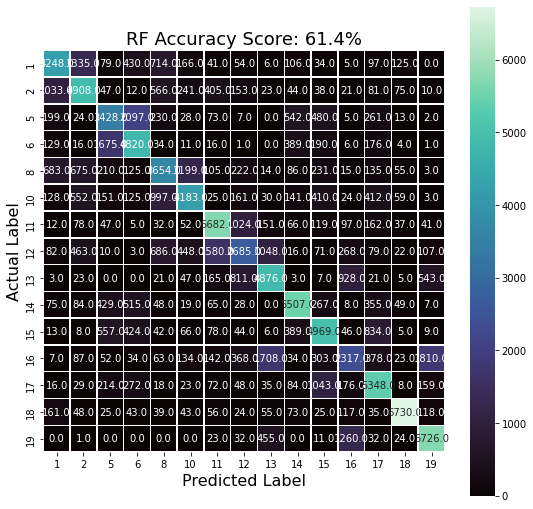

In [11]:
#Create a confusion matrix
matrix = confusion_matrix(y_test, y_prediction)

#Visualize the matrix with Seaborn

#Write title to display accuracy score
score = accuracy_score(y_test, y_prediction)
all_sample_title = 'RF Accuracy Score: {0}%'.format(round(score,3)*100)

#Set figure shape
plt.figure(figsize=(9,9))

#Use heatmap
p = sns.heatmap(matrix, annot=True, fmt=".1f", linewidths=0.5, square=True, cmap="mako")

#Label the plot
label = [1,2,5,6,8,10,11,12,13,14,15,16,17,18,19]
p.set_ylabel('Actual Label', size=16)
p.set_xlabel('Predicted Label', size = 16)
p.set_xticklabels(label)
p.set_yticklabels(label)
p.set_title(all_sample_title, size = 18)

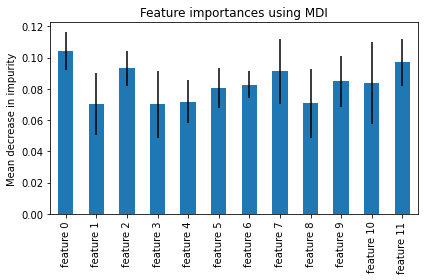

In [12]:
#Find which features were most important
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Random Forest with Engineered Features

In [13]:
#Create NDVI column (B08-B04)/(B08+B04)
sample['NDVI'] = (sample.B08-sample.B04)/(sample.B08+sample.B04)

#Create Moisture index (B8A-B11)/(B8A+B11)
sample['Moisture'] = (sample.B8A-sample.B11)/(sample.B8A+sample.B11)

#Create NDWI (B3-B8)/(B3+B8)
sample['NDWI'] = (sample.B03-sample.B08)/(sample.B03+sample.B08)

#create NDSI (B3-B11)/(B3+B11)
sample['NDSI'] = (sample.B03-sample.B11)/(sample.B03+sample.B11)

#Replace infinity values with Nan
sample.replace([np.inf, -np.inf], np.nan, inplace=True)

#Fill in infinity values
sample.fillna(999, inplace=True)

In [14]:
#Set x and y
y = sample['Class']
X = sample.drop('Class', axis = 1)

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [15]:
#Instantiate Random Forest
rfc = RandomForestClassifier(random_state=123)

#Fit training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [16]:
#Predict X_test
y_prediction = rfc.predict(X_test)

#Print measure scores
print(f"Accuracy: {accuracy_score(y_test, y_prediction)}")
print(f"F1 Score: {f1_score(y_test, y_prediction, average='micro')}")
print(f"Precision Score: {precision_score(y_test, y_prediction, average='micro')}")
print(f"Recall Score: {recall_score(y_test, y_prediction, average='micro')}")
print(f"ROC AUC Score: {roc_auc_score(y_test, rfc.predict_proba(X_test),multi_class='ovr', average='macro')}")

#print full classification report
print(classification_report(y_test, y_prediction))

Accuracy: 0.6140177777777778
F1 Score: 0.6140177777777778
Precision Score: 0.6140177777777778
Recall Score: 0.6140177777777778
ROC AUC Score: 0.9459542289932859
              precision    recall  f1-score   support

           1       0.62      0.57      0.59      7440
           2       0.59      0.64      0.61      7657
           5       0.50      0.47      0.48      7389
           6       0.54      0.64      0.59      7468
           8       0.51      0.48      0.49      7412
          10       0.62      0.56      0.59      7401
          11       0.68      0.75      0.71      7605
          12       0.48      0.37      0.41      7568
          13       0.59      0.66      0.62      7453
          14       0.74      0.74      0.74      7456
          15       0.61      0.66      0.63      7490
          16       0.44      0.31      0.37      7460
          17       0.63      0.71      0.67      7545
          18       0.93      0.89      0.91      7592
          19       0.67     

Text(0.5, 1.0, 'RF Accuracy Score: 61.4%')

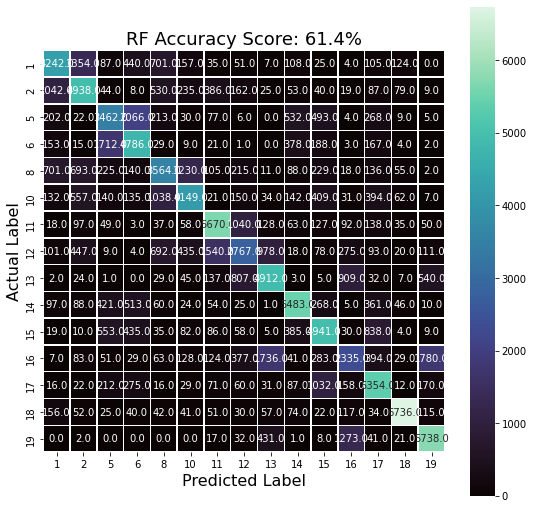

In [17]:
#Create a confusion matrix
matrix = confusion_matrix(y_test, y_prediction)

#Visualize the matrix with Seaborn

#Write title to display accuracy score
score = accuracy_score(y_test, y_prediction)
all_sample_title = 'RF Accuracy Score: {0}%'.format(round(score,3)*100)

#Set figure shape
plt.figure(figsize=(9,9))

#Use heatmap
p = sns.heatmap(matrix, annot=True, fmt=".1f", linewidths=0.5, square=True, cmap="mako")

#Label the plot
label = [1,2,5,6,8,10,11,12,13,14,15,16,17,18,19]
p.set_ylabel('Actual Label', size=16)
p.set_xlabel('Predicted Label', size = 16)
p.set_xticklabels(label)
p.set_yticklabels(label)
p.set_title(all_sample_title, size = 18)

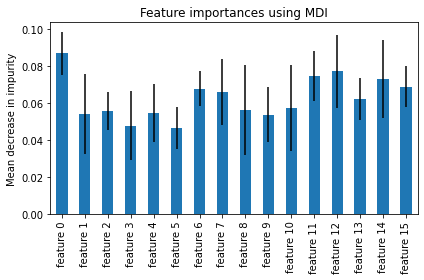

In [18]:
#Find which features were most important
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()